### Data Cleaning

In [1]:
import pandas as pd
import numpy as np

population = pd.read_excel('../Data/populationSeoul.xlsx')

/Users/junghunlee/anaconda3/envs/BusinessAnalytics_python/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
population['동별(2)'] = population['동별(2)'].fillna(method = 'ffill')

In [3]:
population['new_index'] = population['동별(2)'].astype(str) + population['동별(3)']

In [4]:
population.set_index('new_index', inplace=True)

In [5]:
#population = population.drop(['동별(1)', '동별(2)', '동별(3)'], axis = 1)
population = population.drop('동별(2)동별(3)')

In [6]:
foreign = population.iloc[1:,-2].astype(int)

In [7]:
pop = population.iloc[1:,4].astype(int)

In [8]:
foreigner = foreign / pop
population['foreign_ratio'] = foreigner

In [9]:
provin_list = population['동별(2)'].unique()[2:]

In [10]:
rate = []
for i in provin_list :
    rate.append(population[population['동별(2)'] == i].iloc[1,-1])

Text(0.5, 1.0, 'Seoul Foreigner Rate')

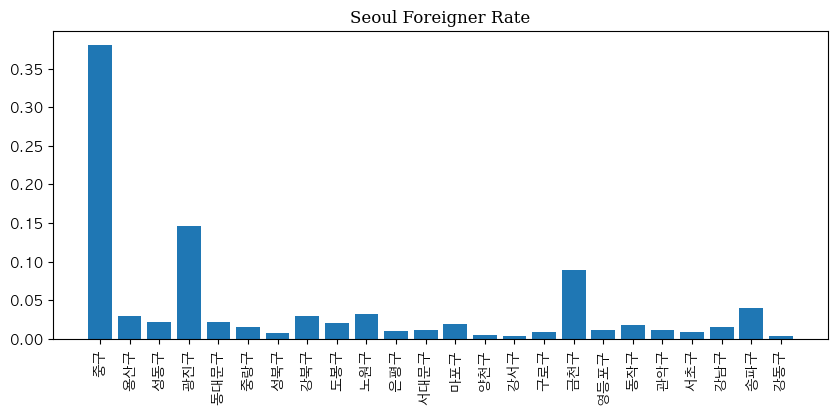

In [11]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

rc('font', family = 'AppleGothic')
plt.figure(figsize = (10, 4))
plt.bar(provin_list, rate)
plt.rcdefaults()
plt.xticks(rotation = 90)
plt.title('Seoul Foreigner Rate', fontsize = 12, fontfamily = 'Serif')

In [12]:
population.columns = ['ancestry', 'population', 'korean', 'foreigner', 'density', 'foreign_rate']
population

ValueError: Length mismatch: Expected axis has 9 elements, new values have 6 elements

In [ ]:
ancestry_sum = population.iloc[:,0]

In [ ]:
ancestry_sum

#### 기초생활수급자

In [13]:
basicLivelihood = pd.read_excel('../Data/기초생활수급.xlsx')

/Users/junghunlee/anaconda3/envs/BusinessAnalytics_python/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [14]:
basicLivelihood

,동별(1),동별(2),동별(3),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10
0,동별(1),동별(2),동별(3),총 수급자,총 수급자,총 수급자,일반수급자,일반수급자,조건부 수급자,조건부 수급자,특례수급자,특례수급자,시설수급자,시설수급자
1,동별(1),동별(2),동별(3),가구 (가구),시설 (개소),인원 (명),가구 (가구),인원 (명),가구 (가구),인원 (명),가구 (가구),인원 (명),시설 (개소),인원 (명)
2,합계,소계,소계,289518,610,403311,243297,318724,40243,66245,5978,7558,610,10784
3,본청,소계,소계,-,5,679,-,-,-,-,-,-,5,679
4,NaN,종로구,소계,4215,14,5559,3615,4221,419,593,181,195,14,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,NaN,NaN,천호2동,1510,-,2002,1267,1623,210,338,33,41,-,-
476,NaN,NaN,길동,1241,-,1637,1015,1285,205,329,21,23,-,-
477,NaN,NaN,상일1동,292,-,396,248,313,40,78,4,5,-,-
478,NaN,NaN,상일2동,423,-,689,357,551,53,117,13,21,-,-


In [15]:
basicLivelihood['동별(2)'] = basicLivelihood['동별(2)'].fillna(method = 'ffill')

In [16]:
basicLivelihood['new_index'] = basicLivelihood['동별(2)'].astype(str) + basicLivelihood['동별(3)']

In [17]:
basicLivelihood.set_index('new_index', inplace=True)

In [18]:
#basicLivelihood = basicLivelihood.drop(['소계소계'])
#basicLivelihood = basicLivelihood.drop(['동별(1)','동별(2)','동별(3)'], axis = 1)
basicLivelihood = basicLivelihood.iloc[:,:7]
basicLivelihood.columns = ['ancestry', '시설', 'sum_bsc_lklhood', 'gen_bsc_lklhood', 'gen_pop', 'con_bsc_anc', 'pop_bsc']

In [19]:
basicLivelihood = basicLivelihood.iloc[2:]

In [20]:
population

,동별(1),동별(2),동별(3),2023 2/4,2023 2/4.1,2023 2/4.2,2023 2/4.3,2023 2/4.4,foreign_ratio
new_index,,,,,,,,,
소계소계,합계,소계,소계,4469158,9659322,9414093,245229,2,NaN
종로구소계,NaN,종로구,소계,72507,151349,140397,10952,2,0.072363
종로구사직동,NaN,종로구,사직동,4570,9362,9089,273,2,0.029160
종로구삼청동,NaN,종로구,삼청동,1127,2576,2277,299,2,0.116071
종로구부암동,NaN,종로구,부암동,4128,9377,9112,265,2,0.028261
...,...,...,...,...,...,...,...,...,...
강동구둔촌2동,NaN,강동구,둔촌2동,10329,24169,24058,111,2,0.004593
강동구길동,NaN,강동구,길동,21961,45142,44808,334,2,0.007399
강동구강일동,NaN,강동구,강일동,13109,32996,32811,185,3,0.005607


In [21]:
basicLivelihood = basicLivelihood.drop(['시설'], axis = 1)

In [22]:
basicLivelihood

,ancestry,sum_bsc_lklhood,gen_bsc_lklhood,gen_pop,con_bsc_anc,pop_bsc
new_index,,,,,,
소계소계,합계,소계,289518,610,403311,243297
소계소계,본청,소계,-,5,679,-
종로구소계,NaN,소계,4215,14,5559,3615
종로구사직동,NaN,사직동,112,-,125,105
종로구삼청동,NaN,삼청동,38,-,45,29
...,...,...,...,...,...,...
강동구천호2동,NaN,천호2동,1510,-,2002,1267
강동구길동,NaN,길동,1241,-,1637,1015
강동구상일1동,NaN,상일1동,292,-,396,248


In [23]:
livelihood = basicLivelihood.iloc[:, 1]

In [24]:
livelihood_ratio = livelihood / population.ancestry

AttributeError: 'DataFrame' object has no attribute 'ancestry'

In [25]:
livelihood_ratio.dropna()

NameError: name 'livelihood_ratio' is not defined

In [26]:
rc('font', family = 'AppleGothic')
plt.figure(figsize = (50, 10))
plt.bar(livelihood_ratio.dropna().index, livelihood_ratio.dropna())
plt.rcdefaults()
plt.xticks(rotation = 90)
plt.title('Seoul Foreigner Rate', fontsize = 12, fontfamily = 'Serif')

NameError: name 'livelihood_ratio' is not defined

<Figure size 5000x1000 with 0 Axes>

In [27]:
basicLivelihood['bsc_lvlhood_ratio'] = livelihood_ratio

NameError: name 'livelihood_ratio' is not defined

In [ ]:
basicLivelihood

In [ ]:
#population.to_csv('../Data/Seoul_population.csv')

In [ ]:
#basicLivelihood.to_csv('../Data/basic_livelihood.csv')

#### Labeling

In [28]:
renewal = pd.read_csv('../Data/renewal.csv', encoding = 'cp949')

In [29]:
renewal

,사업번호,자치구,법정동,사업구분,운영구분,추진위원회/조합명,대표지번,진행단계,상태,정비구역명칭,...,지상층수,지하층수,건설세대총수,60미만건설세대수,60이상85이하건설세대수,85초과건설세대수,건축계획비고,위치도,조감도,배치도
0,11110-100002009,종로구,무악동,재건축,조합청산,무악연립제2주택재건축정비사업조합,무악동 71-1,조합청산,운영,무악연립제2주택재건축정비사업조합,...,17.0,3.0,NaN,NaN,134.0,33.0,NaN,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image/assc...
1,11110-100002000,종로구,신영동,재개발(주택정비형),조합,신영제1구역 주택재개발정비사업조합,신영동 158-2,관리처분인가,운영,신영제1구역 주택재개발정비사업,...,7.0,3.0,199.0,41.0,123.0,35.0,NaN,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image?url=...
2,11110-900000727,종로구,교남동,재개발(주택정비형),공공지원자,돈의문2구역 도시정비형 재개발사업(신탁시행자 방식),교남동 28,정비구역지정,운영,도시정비형 재개발사업,...,21.0,5.0,379.0,284.0,85.0,10.0,85초과없어 저장안됨,NaN,NaN,NaN
3,11110-900001050,종로구,창신동,재개발(주택정비형),추진위원회,창신동23?숭인동56일대 주택재개발 정비사업(추정분담금 계산용 홈페이지),창신동 23-2,조합설립추진위원회승인,운영,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11110-100003002,종로구,교남동,재개발(도시정비형),조합,돈의문1구역도시환경정비사업조합,교남동 62-1,조합해산,운영,돈의문1구역도시환경정비사업조합,...,21.0,5.0,2048.0,603.0,958.0,487.0,NaN,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image/assc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,11710-900000938,송파구,풍납동,리모델링,조합,강변현대아파트 리모델링사업조합,풍납동 299-1,조합설립인가,운영,강변현대아파트 리모델링사업조합,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,11710-900000939,송파구,문정동,리모델링,조합,문정건영아파트 리모델링주택조합,문정동 72-3,조합설립인가,운영,문정건영아파트 리모델링주택조합,...,18.0,4.0,NaN,NaN,NaN,81.0,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...
895,11710-900000940,송파구,오금동,리모델링,조합,오금아남아파트 리모델링주택조합,오금동 67-7,조합설립인가,운영,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
896,11710-900000959,송파구,가락동,리모델링,조합,가락쌍용1차아파트 리모델링주택조합,가락동 140,조합설립인가,운영,가락쌍용1차아파트 리모델링주택조합,...,27.0,5.0,NaN,NaN,NaN,NaN,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...


In [30]:
renewal[renewal['용도지역'] != '일반상업지역']

,사업번호,자치구,법정동,사업구분,운영구분,추진위원회/조합명,대표지번,진행단계,상태,정비구역명칭,...,지상층수,지하층수,건설세대총수,60미만건설세대수,60이상85이하건설세대수,85초과건설세대수,건축계획비고,위치도,조감도,배치도
0,11110-100002009,종로구,무악동,재건축,조합청산,무악연립제2주택재건축정비사업조합,무악동 71-1,조합청산,운영,무악연립제2주택재건축정비사업조합,...,17.0,3.0,NaN,NaN,134.0,33.0,NaN,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image/assc...
1,11110-100002000,종로구,신영동,재개발(주택정비형),조합,신영제1구역 주택재개발정비사업조합,신영동 158-2,관리처분인가,운영,신영제1구역 주택재개발정비사업,...,7.0,3.0,199.0,41.0,123.0,35.0,NaN,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image?url=...
3,11110-900001050,종로구,창신동,재개발(주택정비형),추진위원회,창신동23?숭인동56일대 주택재개발 정비사업(추정분담금 계산용 홈페이지),창신동 23-2,조합설립추진위원회승인,운영,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11110-100003002,종로구,교남동,재개발(도시정비형),조합,돈의문1구역도시환경정비사업조합,교남동 62-1,조합해산,운영,돈의문1구역도시환경정비사업조합,...,21.0,5.0,2048.0,603.0,958.0,487.0,NaN,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image/assc...
5,11110-100003019,종로구,내자동,재개발(도시정비형),추진위원회,내자동 도시환경정비사업 조합설립추진위원회,내자동 81,조합설립추진위원회승인,일시중단,내자.필운구역 도시환경정비사업,...,19.0,3.0,266.0,42.0,154.0,70.0,NaN,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image/assc...,https://cleanup.seoul.go.kr/servlet/image/assc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,11710-900000938,송파구,풍납동,리모델링,조합,강변현대아파트 리모델링사업조합,풍납동 299-1,조합설립인가,운영,강변현대아파트 리모델링사업조합,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
894,11710-900000939,송파구,문정동,리모델링,조합,문정건영아파트 리모델링주택조합,문정동 72-3,조합설립인가,운영,문정건영아파트 리모델링주택조합,...,18.0,4.0,NaN,NaN,NaN,81.0,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...
895,11710-900000940,송파구,오금동,리모델링,조합,오금아남아파트 리모델링주택조합,오금동 67-7,조합설립인가,운영,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
896,11710-900000959,송파구,가락동,리모델링,조합,가락쌍용1차아파트 리모델링주택조합,가락동 140,조합설립인가,운영,가락쌍용1차아파트 리모델링주택조합,...,27.0,5.0,NaN,NaN,NaN,NaN,NaN,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...,https://cleanup.seoul.go.kr/servlet/image?url=...


In [31]:
renewal_list = (renewal[renewal['용도지역'] != '일반상업지역']['자치구'].astype(str) + renewal[renewal['용도지역'] != '일반상업지역']['법정동']).unique()

In [32]:
set(basicLivelihood.index)

{'강남구개포1동',
 '강남구개포2동',
 '강남구개포4동',
 '강남구기타',
 '강남구논현1동',
 '강남구논현2동',
 '강남구대치1동',
 '강남구대치2동',
 '강남구대치4동',
 '강남구도곡1동',
 '강남구도곡2동',
 '강남구삼성1동',
 '강남구삼성2동',
 '강남구세곡동',
 '강남구소계',
 '강남구수서동',
 '강남구신사동',
 '강남구압구정동',
 '강남구역삼1동',
 '강남구역삼2동',
 '강남구일원1동',
 '강남구일원2동',
 '강남구일원본동',
 '강남구청담동',
 '강동구강일동',
 '강동구고덕1동',
 '강동구고덕2동',
 '강동구기타',
 '강동구길동',
 '강동구둔촌1동',
 '강동구둔촌2동',
 '강동구명일1동',
 '강동구명일2동',
 '강동구상일1동',
 '강동구상일2동',
 '강동구성내1동',
 '강동구성내2동',
 '강동구성내3동',
 '강동구소계',
 '강동구암사1동',
 '강동구암사2동',
 '강동구암사3동',
 '강동구천호1동',
 '강동구천호2동',
 '강동구천호3동',
 '강북구기타',
 '강북구미아동',
 '강북구번1동',
 '강북구번2동',
 '강북구번3동',
 '강북구삼각산동',
 '강북구삼양동',
 '강북구소계',
 '강북구송중동',
 '강북구송천동',
 '강북구수유1동',
 '강북구수유2동',
 '강북구수유3동',
 '강북구우이동',
 '강북구인수동',
 '강서구가양1동',
 '강서구가양2동',
 '강서구가양3동',
 '강서구공항동',
 '강서구기타',
 '강서구등촌1동',
 '강서구등촌2동',
 '강서구등촌3동',
 '강서구발산1동',
 '강서구방화1동',
 '강서구방화2동',
 '강서구방화3동',
 '강서구소계',
 '강서구염창동',
 '강서구우장산동',
 '강서구화곡1동',
 '강서구화곡2동',
 '강서구화곡3동',
 '강서구화곡4동',
 '강서구화곡6동',
 '강서구화곡8동',
 '강서구화곡본동',
 '관악구기타',
 '관악구낙성대동',
 '관악구난곡동',
 '관악구난향동',
 '관악구남

In [33]:
temp_list = list(set(basicLivelihood.index) & set(renewal_list))

In [34]:
basicLivelihood.loc[temp_list]

,ancestry,sum_bsc_lklhood,gen_bsc_lklhood,gen_pop,con_bsc_anc,pop_bsc
new_index,,,,,,
서대문구북아현동,NaN,북아현동,484,-,595,418
마포구신수동,NaN,신수동,305,-,410,230
성동구용답동,NaN,용답동,728,-,918,533
은평구녹번동,NaN,녹번동,1307,-,1749,1098
마포구아현동,NaN,아현동,382,-,524,302
마포구공덕동,NaN,공덕동,908,-,1151,768
성북구동선동,NaN,동선동,380,-,458,296
은평구역촌동,NaN,역촌동,1641,-,2368,1364
성북구종암동,NaN,종암동,1081,-,1401,872


In [35]:
rc('font', family = 'AppleGothic')
plt.figure(figsize = (5, 25))
plt.barh(livelihood_ratio.dropna().index, livelihood_ratio.dropna())
plt.barh(basicLivelihood.loc[temp_list]['bsc_lvlhood_ratio'].index, 
        basicLivelihood.loc[temp_list]['bsc_lvlhood_ratio'],
        color = 'darkorange')
plt.rcdefaults()
plt.title('Basic Livelihood Ratio', fontsize = 12, fontfamily = 'Serif')

NameError: name 'livelihood_ratio' is not defined

<Figure size 500x2500 with 0 Axes>

#### 행정동 법정동 처리

In [2]:
import pandas as pd
import numpy as np

In [3]:
what = pd.read_excel('../Data/행정법정.xlsx')

In [4]:
what['행정동'] = what['시군구명'].astype(str) + what['동리명']
what['법정동'] = what['시군구명'].astype(str) + what['읍면동명']

In [5]:
what

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,행정동,법정동
0,1100000000,서울특별시,NaN,NaN,1100000000,서울특별시,19880423,NaN,nan서울특별시,NaN
1,1111000000,서울특별시,종로구,NaN,1111000000,종로구,19880423,NaN,종로구종로구,NaN
2,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN,종로구청운동,종로구청운효자동
3,1111051500,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN,종로구신교동,종로구청운효자동
4,1111051500,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN,종로구궁정동,종로구청운효자동
...,...,...,...,...,...,...,...,...,...,...
21773,5183035000,강원특별자치도,양양군,강현면,5183035038,장산리,20230611,NaN,양양군장산리,양양군강현면
21774,5183035000,강원특별자치도,양양군,강현면,5183035039,전진리,20230611,NaN,양양군전진리,양양군강현면
21775,5183035000,강원특별자치도,양양군,강현면,5183035040,주청리,20230611,NaN,양양군주청리,양양군강현면
21776,5183035000,강원특별자치도,양양군,강현면,5183035041,적은리,20230611,NaN,양양군적은리,양양군강현면


In [6]:
change = pd.DataFrame(what['법정동'].values, index = what.행정동)

In [7]:
change

,0
행정동,
nan서울특별시,NaN
종로구종로구,NaN
종로구청운동,종로구청운효자동
종로구신교동,종로구청운효자동
종로구궁정동,종로구청운효자동
...,...
양양군장산리,양양군강현면
양양군전진리,양양군강현면
양양군주청리,양양군강현면


In [8]:
renewal['법정동변경'] = renewal['자치구'].astype(str) + renewal['법정동']
renewal.index = renewal['법정동변경']
renewal

NameError: name 'renewal' is not defined

In [ ]:
renewal['행정법정'] = np.nan

In [ ]:
merged_df = pd.merge(renewal, change, left_index=True, right_index=True, how='inner')

In [ ]:
merged_df.index = merged_df[0]

In [ ]:
merged_df

In [ ]:
renewal_list = merged_df.index.unique()

In [ ]:
renewal_list

In [ ]:
temp_list = list(set(basicLivelihood.index) & set(renewal_list))

In [45]:
change

,0
행정동,
nan서울특별시,NaN
종로구종로구,NaN
종로구청운동,종로구청운효자동
종로구신교동,종로구청운효자동
종로구궁정동,종로구청운효자동
...,...
양양군장산리,양양군강현면
양양군전진리,양양군강현면
양양군주청리,양양군강현면


In [ ]:
rc('font', family = 'AppleGothic')
plt.figure(figsize = (5, 25))
plt.barh(livelihood_ratio.dropna().index, livelihood_ratio.dropna())
plt.barh(basicLivelihood.loc[temp_list]['bsc_lvlhood_ratio'].index, 
        basicLivelihood.loc[temp_list]['bsc_lvlhood_ratio'],
        color = 'darkorange')
plt.rcdefaults()
plt.title('Basic Livelihood Ratio', fontsize = 12, fontfamily = 'Serif')

#### spread 법정동 / 행정동 처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

spread = pd.read_csv('../Data/house_spread.csv', index_col = 0)
spread

,0
시군구,
강남구개포동,0.560650
강남구논현동,0.397695
강남구대치동,0.543684
강남구도곡동,0.444332
강남구삼성동,0.530143
...,...
종로구누하동,-inf
종로구명륜4가,-inf
종로구체부동,-inf


In [20]:
temp = change.iloc[2:].loc[spread.index]

In [26]:
temp

,0
시군구,
강남구개포동,강남구개포1동
강남구개포동,강남구개포2동
강남구개포동,강남구개포3동
강남구개포동,강남구개포4동
강남구논현동,강남구논현1동
...,...
종로구누하동,종로구청운효자동
종로구명륜4가,종로구혜화동
종로구체부동,종로구사직동


In [28]:
temp['spread'] = np.nan

In [32]:
for i in spread.index :
    temp.loc[i, 'spread'] = spread.loc[i, '0']